<div style="background-color:#e6f2ff; padding:15px; border-radius:8px;">
  <h1>🌍 Infant Mortality — Global Analysis with Our World in Data</h1>
  <p>This notebook explores global trends in <strong>infant mortality</strong> using data from 
  <a href="https://ourworldindata.org/child-mortality">Our World in Data</a>, an online publication developed by researchers at the <strong>University of Oxford</strong>. Its mission is to show how the world is changing through <em>empirical data</em>, <em>interactive visualizations</em>, and <em>accessible analysis</em> for the general public.</p>

  <h2>📁 Dataset Overview</h2>
  <p>We use the <strong>Child Mortality Rate</strong> dataset, which provides information on the <strong>percentage of child deaths</strong> relative to each country's population.</p>

  <h2>📌 Key Considerations</h2>
  <ul>
    <li>📅 Records date back to <strong>1751</strong> for a few countries; others begin more recently.</li>
    <li>🌐 No data available for:
      <ul>
        <li>🇨🇮 <strong>Ivory Coast</strong></li>
        <li>🇨🇩 <strong>Democratic Republic of the Congo</strong></li>
      </ul>
    </li>
  </ul>

  <blockquote>This analysis aims to identify patterns, regional contrasts, and historical trends in infant mortality.</blockquote>
</div>

<div style="background-color:#e6ffe6; padding:15px; border-radius:8px;">
  <h1>🌍 Mortalidad Infantil — Análisis Global con Our World in Data</h1>
  <p>Este notebook analiza las tendencias globales en <strong>mortalidad infantil</strong> utilizando datos de 
  <a href="https://ourworldindata.org/child-mortality">Our World in Data</a>, una publicación en línea desarrollada por investigadores de la <strong>Universidad de Oxford</strong>. Su objetivo es mostrar cómo está cambiando el mundo a través de <em>datos empíricos</em>, <em>visualizaciones interactivas</em> y <em>análisis accesibles</em> para el público general.</p>

  <h2>📁 Conjunto de datos</h2>
  <p>Se utiliza el conjunto de datos <strong>Child Mortality Rate</strong>, que contiene información sobre el <strong>porcentaje de mortalidad infantil</strong> en relación con la población total de cada país.</p>

  <h2>📌 Aspectos clave</h2>
  <ul>
    <li>📅 Los registros comienzan en <strong>1751</strong> para algunos países; otros tienen datos más recientes.</li>
    <li>🌐 No hay información disponible para:
      <ul>
        <li>🇨🇮 <strong>Costa de Marfil</strong></li>
        <li>🇨🇩 <strong>República Democrática del Congo</strong></li>
      </ul>
    </li>
  </ul>

  <blockquote>Este análisis busca identificar patrones, contrastes regionales y tendencias históricas en la mortalidad infantil.</blockquote>
</div>

<div style="background-color:#e6f2ff; padding:15px; border-radius:8px;">
  <h3>📊 Dataset Overview</h3>
  <p>This notebook uses the <strong>Child Mortality Rate</strong> dataset from <em>Our World in Data</em>, covering global trends from 1751 onward.</p>
</div>


In [63]:
# 📥 Import the necessary libraries for the planned data analysis
# 📥 Realizar las importaciones necesarias para el análisis de datos previsto

import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

In [64]:
# Obtener la información, la cual proviene de "Our World in Data" link: https://ourworldindata.org/grapher/child-mortality#research-and-writing

url = 'https://ourworldindata.org/grapher/child-mortality-gdp-per-capita.csv?v=1&csvType=full&useColumnShortNames=true'
df = pd.read_csv(url)
df.to_csv("../data/raw/child-mortality.csv", index=False)
print("Datos descargados correctamente")

Datos descargados correctamente


In [65]:
df.head()

,Entity,Code,Year,child_mortality_rate,gdp_per_capita,900793-annotations,population_historical,owid_region
0,Afghanistan,AFG,1957,37.13,1253.0,NaN,8588340.0,NaN
1,Afghanistan,AFG,1958,36.52,1298.0,NaN,8723412.0,NaN
2,Afghanistan,AFG,1959,35.95,1307.0,NaN,8869270.0,NaN
3,Afghanistan,AFG,1960,35.32,1326.0,NaN,9035048.0,NaN
4,Afghanistan,AFG,1961,34.76,1309.0,NaN,9214082.0,NaN


In [66]:
# 🧹 Data Cleaning: Removing rows with missing values in Entity (country), Year, and Child Mortality Rate
# 🧹 Limpiar los datos, para este caso se van a eliminar las filas que contengan un valor nulo en pais, año y tasa de mortalidad de menores

df = df.dropna(subset=["Entity", "Year", "child_mortality_rate"])
df.head()

,Entity,Code,Year,child_mortality_rate,gdp_per_capita,900793-annotations,population_historical,owid_region
0,Afghanistan,AFG,1957,37.13,1253.0,NaN,8588340.0,NaN
1,Afghanistan,AFG,1958,36.52,1298.0,NaN,8723412.0,NaN
2,Afghanistan,AFG,1959,35.95,1307.0,NaN,8869270.0,NaN
3,Afghanistan,AFG,1960,35.32,1326.0,NaN,9035048.0,NaN
4,Afghanistan,AFG,1961,34.76,1309.0,NaN,9214082.0,NaN


In [67]:
# 🎛️ Creating selectors for the interactive menu
# 🎛️ Creación de los selectores para el menú interactivo

year_selector = widgets.Dropdown(
    options=sorted(df["Year"].unique(), reverse=True),
    value=df["Year"].max(),
    description="Año:"
)

country_selector = widgets.Dropdown(
    options=sorted(df["Entity"].unique()),
    value="Colombia",
    description="País:"
)

compare_selector = widgets.Dropdown(
    options=["Promedio mundial"] + sorted(df["Entity"].unique()),
    value="Promedio mundial",
    description="Comparar con:"
)

In [68]:
# 📈 Function to update the charts, which receives three parameters to plot the corresponding information
# 📈 Función para actualizar los gráficos, la cual recibe tres parámetros para gráficar la información correspondiente.

def update_chart(year, country, compare):
    df_year = df[df["Year"] == year]

    # Top 5 países por defecto
    top5 = df_year.sort_values("child_mortality_rate", ascending=False).head(5)
    topbest5 = df_year.sort_values("child_mortality_rate", ascending=True).head(5)

    # País seleccionado y comparación
    selected = df_year[df_year["Entity"] == country]
    if compare == "Promedio mundial":
        avg = df_year["child_mortality_rate"].mean()
        compare_label = "Promedio mundial"
    else:
        avg = df_year[df_year["Entity"] == compare]["child_mortality_rate"].values[0]
        compare_label = compare

    # Crear dataframe de comparación
    comp_df = pd.DataFrame({
        "Entity": [country, compare_label],
        "child_mortality_rate": [selected["child_mortality_rate"].values[0], avg]
    })

    # === Gráficos Top 5 ===
    fig1 = px.bar(top5, x="Entity", y="child_mortality_rate",
                  title=f"Top 5 países con mayor mortalidad infantil en {year}",
                  color="child_mortality_rate", color_continuous_scale="Reds")
    
    fig2 = px.bar(topbest5, x="Entity", y="child_mortality_rate",
                  title=f"Top 5 países con menor mortalidad en {year}",
                  color="child_mortality_rate", color_continuous_scale="Greens")

    # === Gráfico de comparación ===
    fig3 = px.bar(comp_df, x="Entity", y="child_mortality_rate",
                  title=f"Comparación de {country} vs {compare_label} ({year})",
                  color="child_mortality_rate", color_continuous_scale="Blues")

    fig1.show()
    fig2.show()
    fig3.show()

In [69]:
# 🧩 Widgets for interactivity
# 🧩 Widgets para interactividad

widgets.interactive(update_chart,
                    year=year_selector,
                    country=country_selector,
                    compare=compare_selector)


interactive(children=(Dropdown(description='Año:', options=(np.int64(2023), np.int64(2022), np.int64(2021), np…

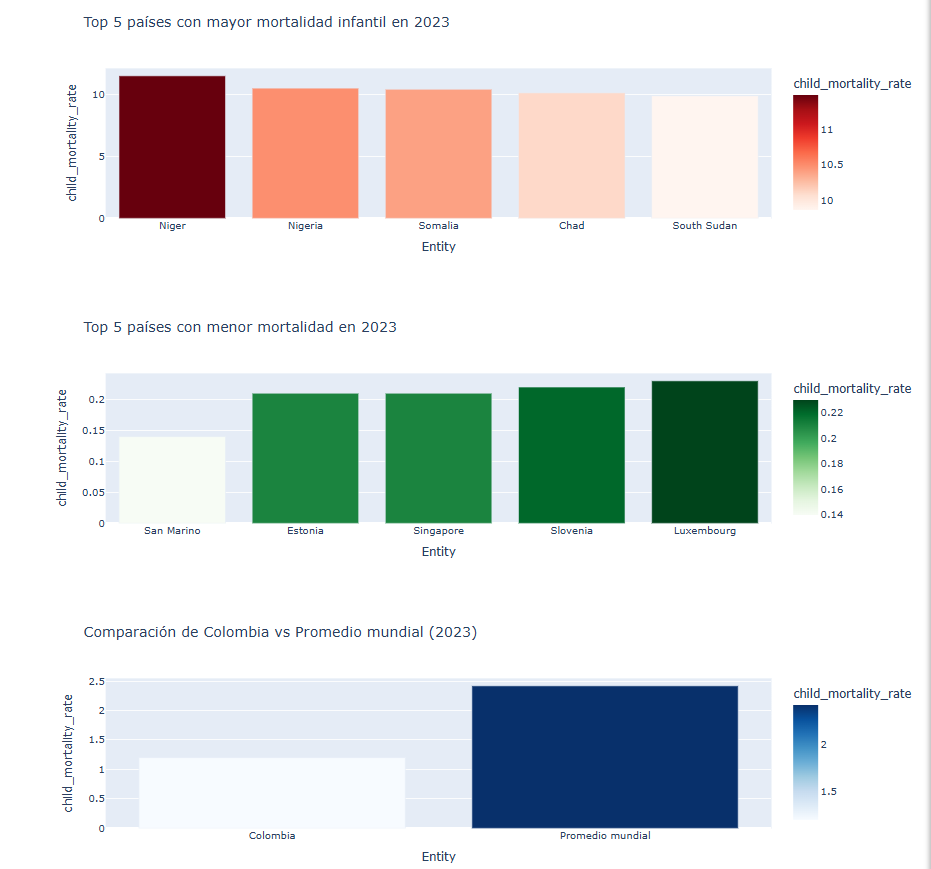

<div style="background-color:#e6f2ff; padding:15px; border-radius:8px;">
  <h3>📊 Analysis of the first charts</h3>
  <p>The first two charts display the countries with the <strong>highest</strong> and <strong>lowest child mortality rates</strong> for the selected year (default is <strong>2023</strong>).</p>
  <p><strong>Niger</strong> and <strong>Nigeria</strong> show the highest rates, while <strong>San Marino</strong> and <strong>Estonia</strong> represent the opposite end with the lowest rates.</p>
  <p>The third chart highlights <strong>Colombia's</strong> position compared to other countries, showing that its child mortality rate is <strong>significantly lower than the global average</strong>.</p>
</div>

<div style="background-color:#e6ffe6; padding:15px; border-radius:8px;">
  <h3>📊 Análisis de los primeros gráficos</h3>
  <p>La información presentada en los dos primeros gráficos muestra los países con la <strong>mayor</strong> y <strong>menor tasa de mortalidad infantil</strong> en el año seleccionado (por defecto, <strong>2023</strong>).</p>
  <p>Se observa que <strong>Níger</strong> y <strong>Nigeria</strong> concentran las tasas más altas, mientras que <strong>San Marino</strong> y <strong>Estonia</strong> presentan el contraste opuesto, con las tasas más bajas.</p>
  <p>En el tercer gráfico se analiza la posición de <strong>Colombia</strong> en relación con otros países, reflejando que su tasa de mortalidad infantil es <strong>significativamente menor al promedio global</strong>.</p>
</div>

In [70]:
import pycountry
import warnings
warnings.filterwarnings("ignore")  # opcional, oculta otros avisos no críticos

# 🔧 Convertir nombres de países a ISO-3
def to_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

# Crear columna nueva si no existe
if "iso_code" not in df.columns:
    df["iso_code"] = df["Entity"].apply(to_iso3)

# Eliminar filas sin código válido
df = df.dropna(subset=["iso_code"])

# === Mapa corregido ===
def update_map(year):
    df_year = df[df["Year"] == year]

    fig = px.choropleth(
        df_year,
        locations="iso_code", 
        locationmode="ISO-3",
        color="child_mortality_rate",
        hover_name="Entity",
        title=f"Tasa de mortalidad infantil por país - {year}",
        color_continuous_scale="Reds"
    )
    fig.update_layout(height=600)
    fig.show()

widgets.interact(update_map, year=year_selector)


interactive(children=(Dropdown(description='Año:', options=(np.int64(2023), np.int64(2022), np.int64(2021), np…

<function __main__.update_map(year)>

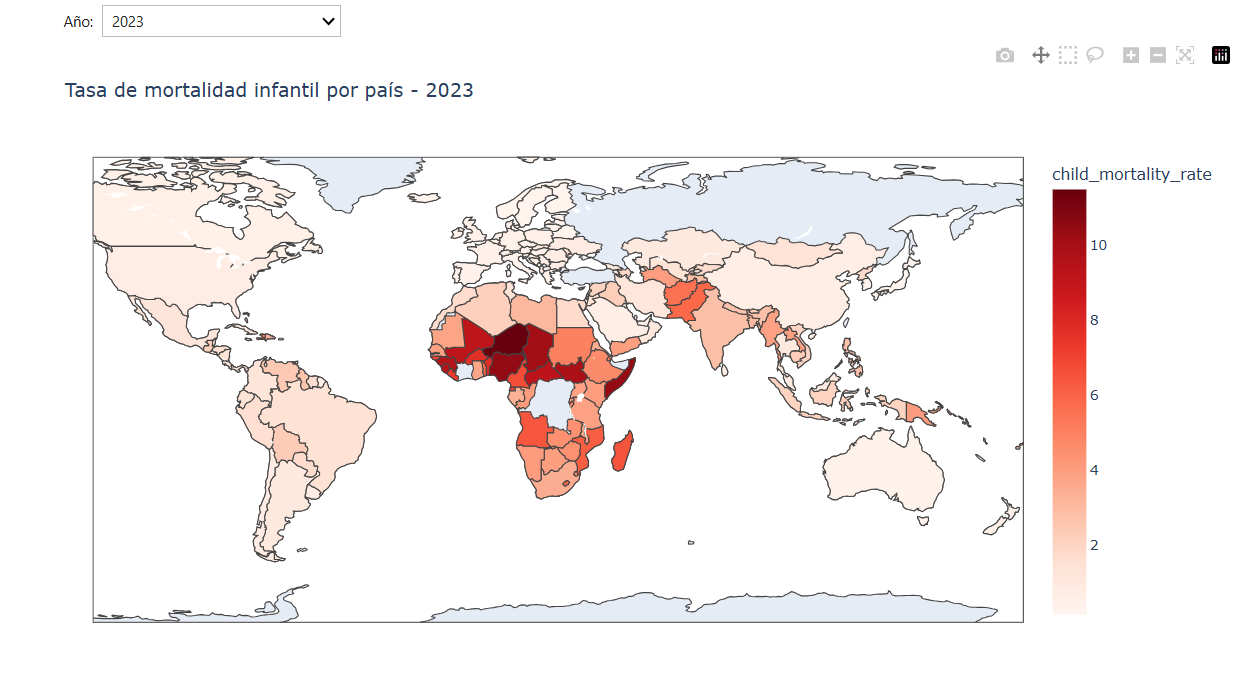

<div style="background-color:#e6f2ff; padding:15px; border-radius:8px;">
  <h3>🗺️ Global Chart Analysis</h3>
  <p>This chart displays the <strong>global child mortality rate</strong> for any selected year (default is <strong>2023</strong>).</p>
  <p>It shows that the <strong>highest concentration of child mortality</strong> is found in the <strong>African continent</strong>.</p>
  <p>Notably, some countries appear blank—such as <strong>Ivory Coast</strong> and the <strong>Democratic Republic of the Congo</strong>—because <strong>no data was available</strong> to include them in the analysis.</p>
</div>

<div style="background-color:#e6ffe6; padding:15px; border-radius:8px;">
  <h3>🗺️ Análisis del gráfico global</h3>
  <p>Este gráfico muestra cómo se encuentra la <strong>tasa de mortalidad infantil a nivel global</strong> para cualquier año seleccionado (por defecto, <strong>2023</strong>).</p>
  <p>Se observa que la <strong>mayor concentración de mortalidad infantil</strong> se encuentra en el continente <strong>africano</strong>.</p>
  <p>Es importante destacar que algunos países aparecen en blanco, como <strong>Costa de Marfil</strong> y <strong>República Democrática del Congo</strong>, debido a que <strong>no se encontraron datos disponibles</strong> para realizar su análisis.</p>
</div>

<div style="background-color:#e6f2ff; padding:15px; border-radius:8px;">
  <h2>🧾 Conclusions</h2>
  <p>The analysis reveals that countries with <strong>lower development</strong> or those involved in <strong>armed conflicts</strong> tend to have a <strong>higher child mortality rate</strong> relative to their population. This highlights how survival conditions—especially for children—are closely tied to the <strong>sociopolitical context</strong> of each State.</p>
  <p>It is concerning to see that the <strong>African continent</strong>, historically exploited by other nations for raw materials, continues to suffer the consequences of such exploitation. The <strong>United Nations</strong>, tasked with maintaining peace, protecting human rights, promoting sustainable development, and coordinating humanitarian aid, should implement measures that <strong>help reduce this crisis</strong>, especially by establishing policies targeting the countries that benefited most from Africa and contributed to its current state of conflict.</p>
  <p>Regarding <strong>Colombia</strong>, despite being a nation with internal conflict and less development compared to European countries, it shows a <strong>child mortality rate well below the global average</strong>. However, it should be a <strong>national priority</strong> to implement actions aimed at reducing this phenomenon by identifying and addressing its root causes.</p>
</div>


<div style="background-color:#e6ffe6; padding:15px; border-radius:8px;">
  <h2>🧾 Conclusiones</h2>
  <p>El resultado del análisis muestra cómo los países con <strong>menor desarrollo</strong> o inmersos en <strong>conflictos bélicos</strong> presentan una <strong>mayor tasa de mortalidad infantil</strong> en relación con su población. Esto evidencia que las condiciones de supervivencia de los menores están profundamente ligadas a las <strong>condiciones sociopolíticas</strong> de cada Estado.</p>
  <p>Es preocupante observar que el <strong>continente africano</strong>, históricamente explotado por otras naciones para la obtención de materias primas, continúa sufriendo las consecuencias de dichas explotaciones. La <strong>ONU</strong>, como organismo encargado de mantener la paz, proteger los derechos humanos, promover el desarrollo sostenible y coordinar la ayuda humanitaria, debería implementar medidas que <strong>contribuyan a reducir este flagelo</strong>, especialmente a través de políticas dirigidas a los países que más se beneficiaron del continente y que, por sus acciones pasadas, contribuyeron al actual escenario de conflictividad.</p>
  <p>En cuanto a <strong>Colombia</strong>, a pesar de ser una nación con conflicto interno y menor desarrollo en comparación con países europeos, presenta una <strong>tasa de mortalidad infantil inferior al promedio mundial</strong>. No obstante, debería ser una <strong>prioridad para el Gobierno Nacional</strong> implementar acciones orientadas a reducir este fenómeno, identificando y contrarrestando sus principales causas.</p>
</div>
